In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap

In [40]:
df_p = pd.read_csv('./Data/Pedestrian_Counting_System_-_Monthly__counts_per_hour_.csv')

In [39]:
constrain_wd = (df_p.Day == 'Monday') | (df_p.Day == 'Tuesday') | (df_p.Day == 'Wednesday') | (df_p.Day == 'Thursday') | (df_p.Day == 'Friday')
constrain_we = (df_p.Day == 'Saturday') | (df_p.Day == 'Sunday')
df_p_we = df_p.loc[constrain_we]
df_p_wd = df_p.loc[constrain_wd]

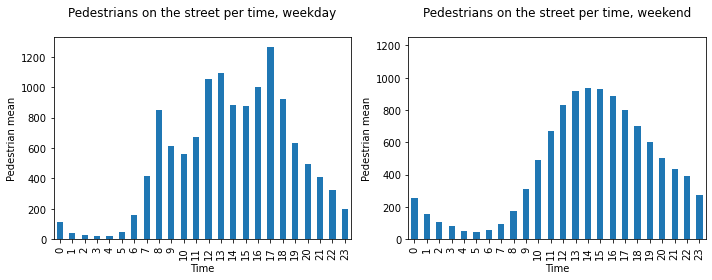

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
df_p_wd.groupby(['Time']).mean()['Hourly_Counts'].plot.bar(title='Pedestrians on the street per time, weekday\n', ax=ax[0])
df_p_we.groupby(['Time']).mean()['Hourly_Counts'].plot.bar(title='Pedestrians on the street per time, weekend\n', ax=ax[1])

ax[0].set_ylabel('Pedestrian mean');
ax[1].set_ylabel('Pedestrian mean');
plt.ylim(0, 1250)

plt.tight_layout() 
plt.show()

Here is a split of the dataset in weekdays and weekends over all years. It shows their mean as we have a different amount of days in both datasets. The basic curve is similay as the curve shown on the weekends can be found during the weekdays as well. Durinf the week, there are 4 peaks in the data. One at 8 o'clock which is when people go to work. Two are at 12 and 13 o'clock which shows the lunch break. The last one is at 17 o'clock when most of the people leave work. Around the 'rush hour' when people go to work, there are more people around on the streets which can be seen by the bars around the peaks at 8 and 17 o'clock. On the weekends, there are more people up during the nigth walking around.

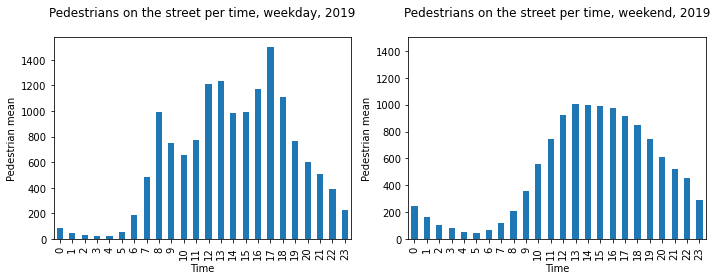

In [61]:
df_p_we_19 = df_p_we.loc[df_p_we.Year == 2019]
df_p_wd_19 = df_p_wd.loc[df_p_wd.Year == 2019]
fig_19, ax_19 = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
df_p_wd_19.groupby(['Time']).mean()['Hourly_Counts'].plot.bar(title='Pedestrians on the street per time, weekday, 2019\n', ax=ax_19[0])
df_p_we_19.groupby(['Time']).mean()['Hourly_Counts'].plot.bar(title='Pedestrians on the street per time, weekend, 2019\n', ax=ax_19[1])

ax_19[0].set_ylabel('Pedestrian mean');
ax_19[1].set_ylabel('Pedestrian mean');
plt.ylim(0, 1500)

plt.tight_layout() 
plt.show()

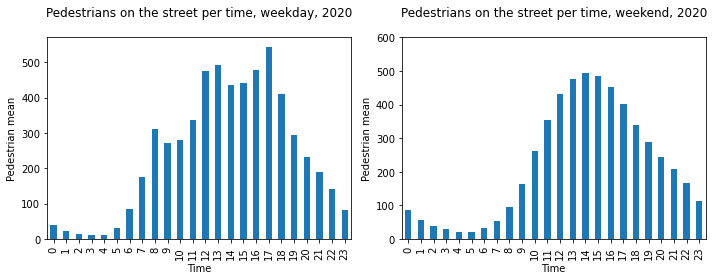

In [63]:
df_p_we_20 = df_p_we.loc[df_p_we.Year == 2020]
df_p_wd_20 = df_p_wd.loc[df_p_wd.Year == 2020]
fig_20, ax_20 = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
df_p_wd_20.groupby(['Time']).mean()['Hourly_Counts'].plot.bar(title='Pedestrians on the street per time, weekday, 2020\n', ax=ax_20[0])
df_p_we_20.groupby(['Time']).mean()['Hourly_Counts'].plot.bar(title='Pedestrians on the street per time, weekend, 2020\n', ax=ax_20[1])

ax_20[0].set_ylabel('Pedestrian mean');
ax_20[1].set_ylabel('Pedestrian mean');
plt.ylim(0, 600)

plt.tight_layout() 
plt.show()

Next up comes similar plots showing the difference between weeks precovid and during covid. As references we use 2019 (pre covid) and 2020 (during covid). The curve is similar on both plots. The difference is the mean of the data. In 2019 the peak on the weekend is at 1000 people while during covid it only reached 500 people. Similar is it during the week. 